In [10]:
import pandas as pd
import seaborn as sns

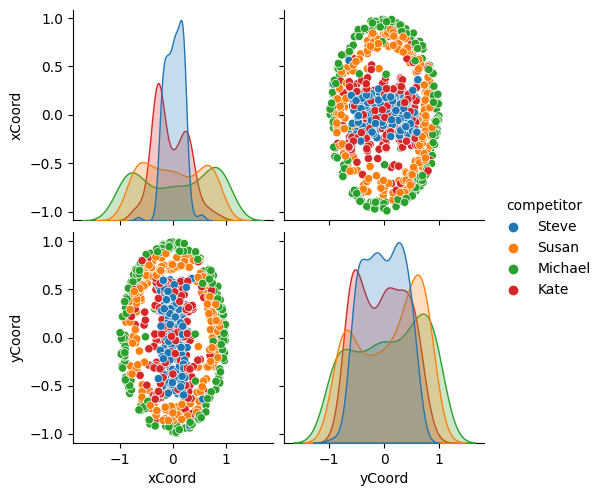

In [12]:
df = pd.read_csv("/workspace/DeepLearningFundamentals/Dokumanlar/03_DeepLearning/data/darts.csv")
sns.pairplot(df,hue="competitor")

In [4]:
#import pandas as pd
#from tensorflow.keras.utils import to_categorical
#result = pd.Categorical(df.competitor)

2023-07-07 09:07:04.288178: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-07 09:07:04.324013: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-07 09:07:04.324760: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 09:07:05.729565: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
#pd.DataFrame(data=result.codes)

,0
0,2
1,3
2,1
3,0
4,2
...,...
795,0
796,2
797,1
798,1


In [13]:
#to_categorical(result.codes)

In [7]:
#df.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


,xCoord,yCoord
count,800.000000,800.000000
mean,0.005943,0.022868
std,0.475971,0.514482
min,-0.991140,-0.993547
25%,-0.295314,-0.423079
50%,0.000619,0.034483
75%,0.273953,0.452204
max,0.984816,0.994344


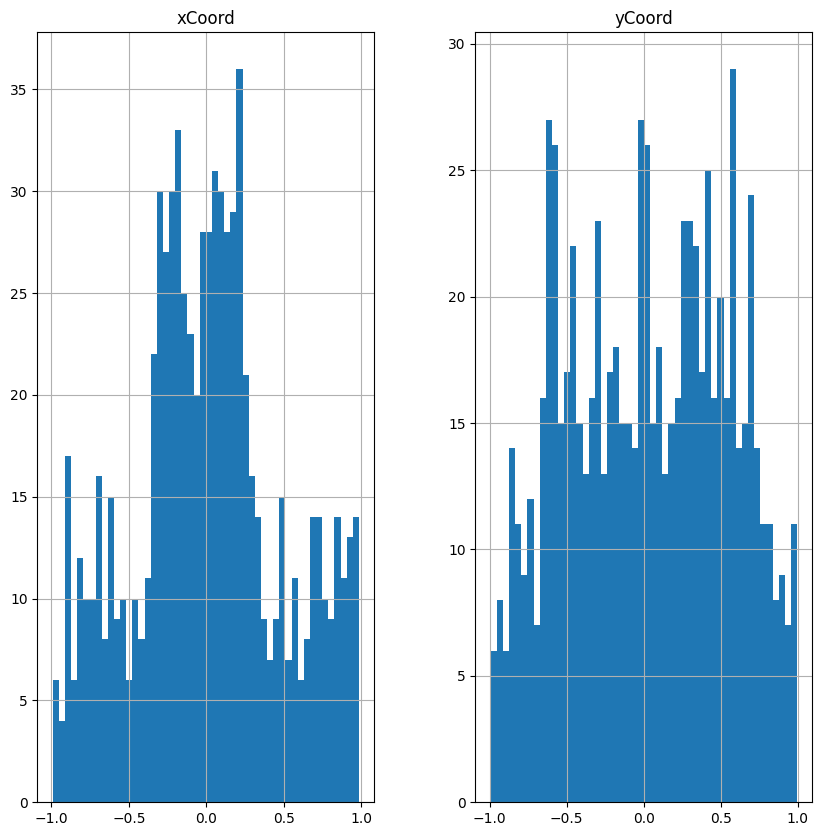

In [8]:
#df.hist(figsize=(10,10), bins=50)
#df.describe()

In [14]:
#df["competitor"].value_counts()

In [15]:
df.shape

(800, 3)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128,input_shape=(2,),activation="relu"))

model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))

model.add(Dense(4,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [33]:
df.competitor = pd.Categorical(df.competitor).codes

In [34]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(df["competitor"].values)
X = df.drop("competitor",axis=1).values

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [29]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(X_train)
# X_train_scaled = sc.transform(X_train)
# X_test_scaled = sc.transform(X_test)

In [36]:
model.fit(X_train_scaled,y_train,epochs=200)

Epoch 1/200
20/20 [==============================] - 1s 2ms/step - loss: 1.3650 - accuracy: 0.2828
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 1.3098 - accuracy: 0.3375
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 1.2625 - accuracy: 0.3906
Epoch 4/200
20/20 [==============================] - 0s 1ms/step - loss: 1.2028 - accuracy: 0.4656
Epoch 5/200
20/20 [==============================] - 0s 1ms/step - loss: 1.1271 - accuracy: 0.5000
Epoch 6/200
20/20 [==============================] - 0s 1ms/step - loss: 1.0371 - accuracy: 0.5578
Epoch 7/200
20/20 [==============================] - 0s 1ms/step - loss: 0.9587 - accuracy: 0.5922
Epoch 8/200
20/20 [==============================] - 0s 1ms/step - loss: 0.8937 - accuracy: 0.6281
Epoch 9/200
20/20 [==============================] - 0s 1ms/step - loss: 0.8744 - accuracy: 0.6219
Epoch 10/200
20/20 [==============================] - 0s 1ms/step - loss: 0.8468 - accuracy: 0.6438
Epoch 11/